In [9]:
import re
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [10]:
def train_valid_split(dataset, labels, split=0.50):
    train_data = list()
    train_labels = list()
    train_size = split * len(dataset)
    valid_data = list(dataset)
    valid_labels = list(labels)
    while len(train_data) < train_size:
        index = randrange(len(valid_data))
        train_data.append(valid_data.pop(index))
        train_labels.append(valid_labels.pop(index))
    return np.array(train_data), np.array(train_labels), np.array(valid_data), np.array(valid_labels)

In [11]:
def extract_data(filePath, datatype=None):
    if datatype == 'train':
        features = np.zeros((2000, 8))
    elif datatype == 'test':
        features = np.zeros((1001,8))
    classes = np.zeros(2000)
    with open(filePath, 'r') as data:
        i = 0
        for line in data:
            if datatype == 'train':
                classes[i] = int(line.split(None, 1)[0])
            if '1:' in line:
                feat1 = re.findall(r'1:[0-9]\.?[0-9]*', line)
                if len(feat1) == 0:
                    feat1 = [str('1:0')]
                features[i,0] = float(feat1[0].split("1:")[1])
            if '2:' in line:
                feat2 = re.findall(r'2:[0-9]\.?[0-9]*', line)
                if len(feat2) == 0:
                    feat2 = [str('2:0')]
                features[i,1] = float(feat2[0].split("2:")[1])
            if '3:' in line:
                feat3 = re.findall(r'3:[0-9]\.?[0-9]*', line)
                if len(feat3) == 0:
                    feat3 = [str('3:0')]
                features[i,2] = float(feat3[0].split("3:")[1])
            if '4:' in line:
                feat4 = re.findall(r'4:[0-9]\.?[0-9]*', line)
                if len(feat4) == 0:
                    feat4 = [str('4:0')]
                features[i,3] = float(feat4[0].split("4:")[1])
            if '5:' in line:
                feat5 = re.findall(r'5:[0-9]\.?[0-9]*', line)
                if len(feat5) == 0:
                    feat5 = [str('5:0')]
                features[i,4] = float(feat5[0].split("5:")[1])
            if '6:' in line:
                feat6 = re.findall(r'6:[0-9]\.?[0-9]*', line)
                if len(feat6) == 0:
                    feat6 = [str("6:0")]
                features[i,5] = float(feat6[0].split("6:")[1])
            if '7:' in line:
                feat7 = re.findall(r'7:[0-9]\.?[0-9]*', line)
                if len(feat7) == 0:
                    feat7 = [str('7:0')]
                features[i,6] = float(feat7[0].split("7:")[1])
            if '8:' in line:
                feat8 = re.findall(r'8:[0-9]\.?[0-9]*', line)
                if len(feat8) == 0:
                    feat8 = [str('8:0')]
                features[i,7] = float(feat8[0].split("8:")[1])
            i = i+1
    return features, classes

def write_results(result):
    f = open('results.txt', 'a', encoding='utf-8', newline='\n')
    wr = csv.writer(f, lineterminator = '\n')
    for i in range(len(result)):
        line = [int(result[i,0]),"1:"+str(result[i,1]),"2:"+str(result[i,2]),"3:"+str(result[i,3]),"4:"+str(result[i,4]),"5:"+str(result[i,5]),"6:"+str(result[i,6]),"7:"+str(result[i,7]),"8:"+str(result[i,8])]
#         print(line)
        wr.writerow(line)
    f.close()

Best accuracy: 0.95, Best C: 10.00


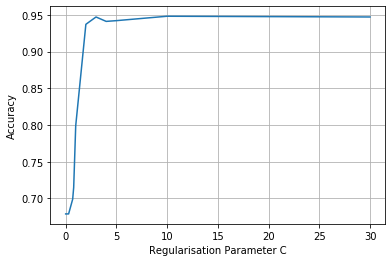

In [19]:
x, y = extract_data("ncrna_train.txt", datatype='train')
x_train, y_train, x_valid, y_valid = train_valid_split(x, y, 0.50)
C = [0.01, 0.1, 0.3, 0.7, 0.8, 1, 2, 3, 4, 5, 10, 30]
accuracy_matrix = np.zeros((len(C), 2))
for i, reg_param in enumerate(C):
    classifier = svm.SVC(C = reg_param, gamma = 0.01, kernel = 'linear', random_state = 0)
    classifier.fit(x_train, y_train)
#     print('Optimal Intercept at : ', classifier.intercept_)
    accuracy = classifier.score(x_valid, y_valid)
    accuracy_matrix[i,0] = reg_param
    accuracy_matrix[i,1] = accuracy
#     print(accuracy, reg_param)
plt.plot(accuracy_matrix[:,0], accuracy_matrix[:,1])
plt.grid()
plt.xlabel("Regularisation Parameter C")
plt.ylabel("Accuracy")
best_index = np.argmax(accuracy_matrix[:,1])
print("Best accuracy: %.2f, Best C: %.2f"%(accuracy_matrix[best_index,1], accuracy_matrix[best_index,0]))

In [18]:
x, y = extract_data("ncrna_train.txt", datatype='train')
x_test, _ = extract_data("ncrna_test.txt", datatype='test')
x_train, y_train, x_valid, y_valid = train_valid_split(x, y, 0.50)
C = [0.01, 0.1, 0.3, 0.7, 0.8, 1, 5, 10, 30, 40, 50, 100]
gamma = [1e-4, 1e-3, 1e-2, 1e-1, 1, 2e-4, 2e-3, 2e-2, 2e-1, 2, 2e1, 2e2]
best_gamma = 0
best_C = 0
best_accuracy = 0
mat = np.zeros((len(C), len(gamma)))
i = 0 #counter for C
for reg_param in C:
#     print("Regularisation: ", reg_param)
    accuracy = np.zeros(5)
    j = 0
    for gamma_param in gamma:
#         print("Gamma:", gamma_param)
        classifier = svm.SVC(C = reg_param, gamma = gamma_param, kernel = 'rbf', random_state = 0)
        k = 0 #counter for folds
        for train_index, test_index in kf.split(x_valid):
#             print("Fold: ", k)
            X_fold_train, X_fold_test = x_valid[train_index], x_valid[test_index]
            Y_fold_train, Y_fold_test = y_valid[train_index], y_valid[test_index]
            classifier.fit(X_fold_train, Y_fold_train)
            accuracy[k] = classifier.score(X_fold_test, Y_fold_test)
            k += 1
        mat[i,j] = np.average(accuracy)
        j += 1
#         print(accuracy)
    i += 1
print("Matrix:\n")
print(mat)
i, j = np.unravel_index(np.argmax(mat), mat.shape)
best_C = C[i]
best_gamma = gamma[j]
print("\nBest C: %.2f, Best Gamma: %.2f, Best Accuracy: %.2f"%(best_C, best_gamma, np.max(mat)))

Matrix:

[[0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696]
 [0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696]
 [0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.696 0.737 0.696]
 [0.696 0.696 0.696 0.696 0.7   0.696 0.696 0.696 0.696 0.767 0.86  0.718]
 [0.696 0.696 0.696 0.696 0.705 0.696 0.696 0.696 0.696 0.822 0.869 0.726]
 [0.696 0.696 0.696 0.696 0.759 0.696 0.696 0.696 0.696 0.887 0.88  0.744]
 [0.696 0.696 0.696 0.703 0.947 0.696 0.696 0.696 0.875 0.944 0.9   0.767]
 [0.696 0.696 0.696 0.885 0.946 0.696 0.696 0.696 0.948 0.94  0.908 0.769]
 [0.696 0.696 0.696 0.948 0.943 0.696 0.696 0.727 0.955 0.94  0.896 0.769]
 [0.696 0.696 0.696 0.954 0.944 0.696 0.696 0.819 0.952 0.94  0.895 0.769]
 [0.696 0.696 0.705 0.953 0.941 0.696 0.696 0.893 0.95  0.943 0.889 0.769]
 [0.696 0.696 0.897 0.953 0.941 0.696 0.696 0.945 0.949 0.942 0.893 0.768]]

Best C: 30.00, Best Gamma: 0.20, Best Accuracy: 0.95


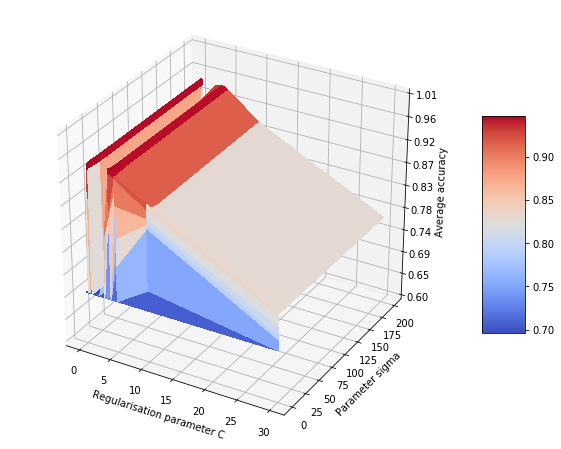

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(C, gamma)
Z = mat.reshape(X.shape)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(0.6, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel("Regularisation parameter C")
ax.set_ylabel("Parameter sigma")
ax.set_zlabel("Average accuracy")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [21]:
result = np.zeros((1001, 9))
classifier = svm.SVC(C = best_C, gamma = best_gamma, kernel = 'rbf', random_state = 0)
classifier.fit(x, y)
# print('Optimal Intercept at : ', classifier.intercept_)
pred_vector = classifier.predict(x_test)
result[:,0] = pred_vector.astype('int')
result[:,1:9] = x_test
write_results(result)